En el Trabajo Práctico de la clase de hoy vamos a usar un dataset de Kaggle que tiene datos de ventas para distintos países (https://www.kaggle.com/kyanyoga/sample-sales-data). Ustedes van a usar un dataset con algunas columnas menos nada más.
Para eso, primero van a descargar el archivo .csv y subirlo a su Drive, junto con este notebook.
1) Primero leean los datos del archivo data_TP4.csv
Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. Algunas de las columnas son:

* ORDERNUMBER: int, id de la orden
* SALES: float, monto abonado
* MONTH_ID: int, mes
* YEAR_ID: int, año
* PRODUCTLINE: str, producto
* COUNTRY: str, país de venta

1. Importar todas las librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

2. Importar un dataset (tener en cuenta el separador a utilizar debe ser: ";") 

In [3]:
df = pd.read_csv("ds_sales_data.csv")
#df = pd.read_csv("ds_sales_data.csv", sep = ",")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

3. Explorar tipos de datos:

In [8]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
df.tail(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [7]:
print(df.shape)

(2823, 25)


In [10]:
df.count()

ORDERNUMBER         2823
QUANTITYORDERED     2823
PRICEEACH           2823
ORDERLINENUMBER     2823
SALES               2823
ORDERDATE           2823
STATUS              2823
QTR_ID              2823
MONTH_ID            2823
YEAR_ID             2823
PRODUCTLINE         2823
MSRP                2823
PRODUCTCODE         2823
CUSTOMERNAME        2823
PHONE               2823
ADDRESSLINE1        2823
ADDRESSLINE2         302
CITY                2823
STATE               1337
POSTALCODE          2747
COUNTRY             2823
TERRITORY           1749
CONTACTLASTNAME     2823
CONTACTFIRSTNAME    2823
DEALSIZE            2823
dtype: int64

In [11]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [14]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [15]:
df.dropna()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,10120,43,76.00,14,3268.00,4/29/2003 0:00,Shipped,2,4,2003,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
2673,10223,26,67.20,15,1747.20,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Small
2685,10361,44,100.00,10,5001.92,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
2764,10361,35,100.00,11,4277.35,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium


In [16]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [17]:
df = df.drop(["ORDERLINENUMBER", "PRODUCTCODE", "PHONE", "ADDRESSLINE2", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis=1)
#dp_filtrado= dp_filtrado[["rORDERLINENUMBER", "PRODUCTCODE", "PHONE", "ADDRESSLINE2", "CONTACTLASTNAME", "CONTACTFIRSTNAME"]]
df.shape

(2823, 19)

In [19]:
df = df.drop(["ADDRESSLINE1", "POSTALCODE", "CUSTOMERNAME"], axis=1)


In [20]:
df = df.drop(["ORDERNUMBER", "MSRP", "QTR_ID"], axis=1)
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,2,2003,Motorcycles,NYC,NY,USA,NaN,Small
1,34,81.35,2765.90,5/7/2003 0:00,Shipped,5,2003,Motorcycles,Reims,NaN,France,EMEA,Small
2,41,94.74,3884.34,7/1/2003 0:00,Shipped,7,2003,Motorcycles,Paris,NaN,France,EMEA,Medium
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,8,2003,Motorcycles,Pasadena,CA,USA,NaN,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,10,2003,Motorcycles,San Francisco,CA,USA,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,12/2/2004 0:00,Shipped,12,2004,Ships,Madrid,NaN,Spain,EMEA,Small
2819,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,2005,Ships,Oulu,NaN,Finland,EMEA,Medium
2820,43,100.00,5417.57,3/1/2005 0:00,Resolved,3,2005,Ships,Madrid,NaN,Spain,EMEA,Medium
2821,34,62.24,2116.16,3/28/2005 0:00,Shipped,3,2005,Ships,Toulouse,NaN,France,EMEA,Small


3) Ahora vamos a centrarnos en las compras que hizo cada país. Lo primero es ver **cuántas compras hizo cada país**, usando el método `value_counts` de `pandas`, pero filtrando por país.

In [21]:
#Vamos a realizar algunos filtros para simplificar nuestro modelo de Regresion!
df_filtro = df["COUNTRY"].value_counts()
df_filtro

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [22]:
df.isnull().sum()

QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
ORDERDATE             0
STATUS                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
CITY                  0
STATE              1486
COUNTRY               0
TERRITORY          1074
DEALSIZE              0
dtype: int64

Ahí empieza a aparecer otro tipo de información, pero quizás sería más práctico verlo en un gráfico de barras. Para eso vamos a pasar a usar `seaborn`, en particular van a hacer un `barplot`, donde los y van a ser los `value_counts` que usamos en el ítem anterior, y los x `los value_counts().index` (los nombres de los países).

In [23]:
df["COUNTRY"].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [24]:
df = df.drop(["STATE", "TERRITORY"], axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)


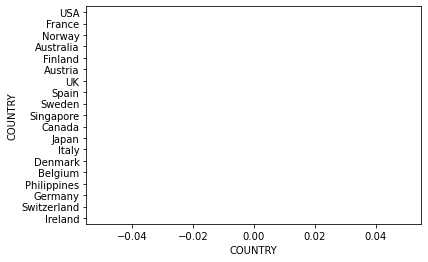

In [26]:
# ahora vamos con correlacion entre variable categorica y variable numerica!
print(sns.barplot(x = df_filtro , y = 'COUNTRY', data = df))

<AxesSubplot:>

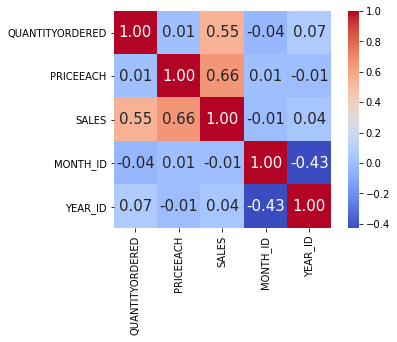

In [27]:
#Antes de armar nuestro modelo de regresion, veamos las correlaciones
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')

Pero todos los países es un montón, vamos a centrarnos en **USA**, **Australia** y **Canadá**. Vamos a armar una lista con esos nombres y armar un nuevo dataframe con el método `isin` para todos los países que aparezcan en la lista.

In [41]:
paises = ['USA', 'Australia', 'Canada']
data_filt = df[df['COUNTRY'].isin(paises)]
data_filt

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,CITY,COUNTRY,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,2,2003,Motorcycles,NYC,USA,Small
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,8,2003,Motorcycles,Pasadena,USA,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,10,2003,Motorcycles,San Francisco,USA,Medium
5,36,96.66,3479.76,10/28/2003 0:00,Shipped,10,2003,Motorcycles,Burlingame,USA,Medium
8,22,98.57,2168.54,12/1/2003 0:00,Shipped,12,2003,Motorcycles,San Francisco,USA,Small
...,...,...,...,...,...,...,...,...,...,...,...
2809,23,65.52,1506.96,5/7/2004 0:00,Cancelled,5,2004,Ships,NYC,USA,Small
2810,29,50.78,1472.62,6/17/2004 0:00,Shipped,6,2004,Ships,Montreal,Canada,Small
2812,33,51.32,1693.56,8/20/2004 0:00,Shipped,8,2004,Ships,Tsawassen,Canada,Small
2817,42,97.16,4080.72,11/21/2004 0:00,Shipped,11,2004,Ships,NYC,USA,Medium


4) El método `describe` nos da el resultado de distintas medidas resumen para valores numéricos. Prueben este método para todo el dataframe a ver qué pasa.

Ahora vamos a centrarnos en la columna de ventas (SALES). Queremos ver las medidas resumen de las compras de los tres países que están en la lista `paises`. Hay varias formas de hacer eso. Prueben alguna para **USA**.

In [57]:
#data_filt[['SALES']]
data_filt.describe()

,QUANTITYORDERED,PRICEEACH,SALES,MONTH_ID,YEAR_ID
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,35.105639,83.848959,3560.511906,7.362986,2003.806195
std,9.763701,20.426297,1843.307199,3.529471,0.705819
min,6.000000,26.880000,541.140000,1.000000,2003.000000
25%,27.000000,69.335000,2225.225000,4.000000,2003.000000
50%,35.000000,96.740000,3186.480000,8.000000,2004.000000
75%,43.000000,100.000000,4512.540000,11.000000,2004.000000
max,85.000000,100.000000,14082.800000,12.000000,2005.000000


5) Vamos a ver cómo es la distribución de compras para estos tres países. Para eso queremos hacer un histograma para cada uno de ellos, sólo teniendo en cuenta la columna SALES. Una forma de hacer eso es crear una variables nueva por país (`data_usa`, por ejemplo).

Creen nuevas variables, filtrando para los países **USA**, **Australia** y **Canada**.

In [63]:
#df2 = df.loc[(df['ingreso_ult_mes'] > df["ingreso_ult_mes"].mean()) & (df['hs_trabajadas'] < df['hs_trabajadas'].mean())] 
print(data_filt[data_filt['COUNTRY']== paises]['SALES'].describe())

ValueError: ('Lengths must match to compare', (1259,), (3,))

In [58]:
df.loc[(df['COUNTRY'] == "USA")] 

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,MONTH_ID,YEAR_ID,PRODUCTLINE,CITY,COUNTRY,DEALSIZE
0,30,95.70,2871.00,2/24/2003 0:00,Shipped,2,2003,Motorcycles,NYC,USA,Small
3,45,83.26,3746.70,8/25/2003 0:00,Shipped,8,2003,Motorcycles,Pasadena,USA,Medium
4,49,100.00,5205.27,10/10/2003 0:00,Shipped,10,2003,Motorcycles,San Francisco,USA,Medium
5,36,96.66,3479.76,10/28/2003 0:00,Shipped,10,2003,Motorcycles,Burlingame,USA,Medium
8,22,98.57,2168.54,12/1/2003 0:00,Shipped,12,2003,Motorcycles,San Francisco,USA,Small
...,...,...,...,...,...,...,...,...,...,...,...
2804,28,64.43,1804.04,11/14/2003 0:00,Shipped,11,2003,Ships,New Bedford,USA,Small
2807,36,63.34,2280.24,2/19/2004 0:00,Shipped,2,2004,Ships,San Diego,USA,Small
2809,23,65.52,1506.96,5/7/2004 0:00,Cancelled,5,2004,Ships,NYC,USA,Small
2817,42,97.16,4080.72,11/21/2004 0:00,Shipped,11,2004,Ships,NYC,USA,Medium


Ahora sí, hagan un histograma para la columna SALES de cada país, usando el método `histplot` de `seaborn`.

<AxesSubplot:>

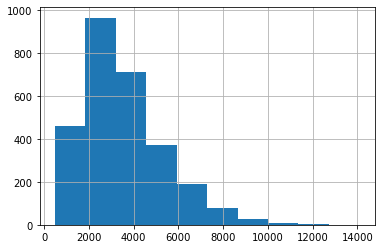

In [51]:
df.SALES.hist()

También podemos graficar los tres histogramas superpuestos, tanto en forma absoluta como normalizada. ¿Nos dará más información?

6) Como ya vimos, los histogramas superpuestos a veces son difíciles de leer. Un gráfico más simple para comparar es el boxplot.
Vamos a usar entonces el método `boxplot` de `seaborn`, con toda la data, donde x va a ser la columna país e y la columna de ventas.

<AxesSubplot:xlabel='COUNTRY', ylabel='SALES'>

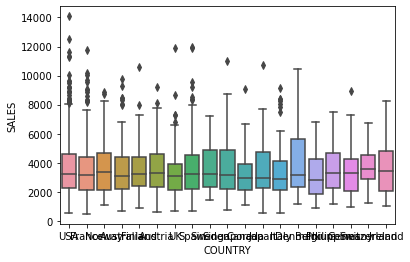

In [52]:
sns.boxplot(x = 'COUNTRY', y = 'SALES', data = df)

Pero de vuelta, no queremos todos los países. Vamos a apegarnos a los países en la lista `paises`.

<AxesSubplot:xlabel='COUNTRY', ylabel='SALES'>

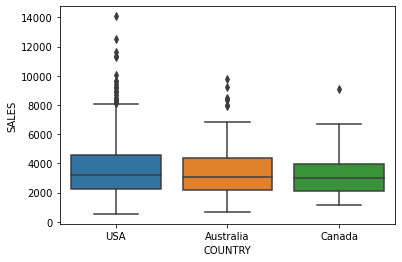

In [59]:
sns.boxplot(x = 'COUNTRY', y = 'SALES', data = data_filt)

6) Por último, es un poco molesto tener que cambiar toooodos los nombres cada vez que queremos agregar un país. ¿Y si mejor armamos una función que me devuelva todos los resultados que acabamos de obtener, para los países en una lista que le pasemos?

In [ ]:
def names(list):    
    for pais in list:
        print(pais)

In [ ]:
names(paises)

USA
Australia
Canada


In [ ]:
def names(list, pais):    
    if pais in list:
        print(pais)

In [ ]:
names(paises, 'USA')

USA


In [ ]:
def stats(list):    
    for pais in list:
        print(pais)
        print(data[data['COUNTRY']== pais]['SALES'].describe())
        print('\n')

In [ ]:
stats(paises)

USA
count     1004.000000
mean      3613.528715
std       1880.934147
min        541.140000
25%       2246.250000
50%       3236.060000
75%       4583.950000
max      14082.800000
Name: SALES, dtype: float64


Australia
count     185.000000
mean     3408.773514
std      1754.157017
min       652.350000
25%      2208.640000
50%      3070.400000
75%      4392.120000
max      9774.030000
Name: SALES, dtype: float64


Canada
count      70.000000
mean     3201.122286
std      1442.516466
min      1119.930000
25%      2098.587500
50%      2982.950000
75%      3943.057500
max      9064.890000
Name: SALES, dtype: float64




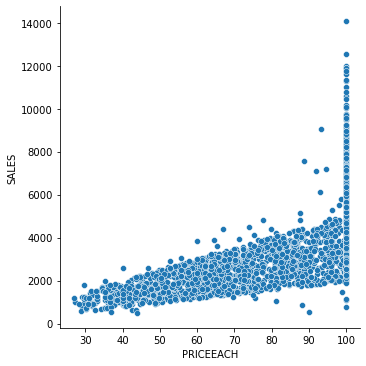

In [66]:
# Primero empezamos con el scatter plot
sns.relplot(x="PRICEEACH", y="SALES", data=df)  

<AxesSubplot:xlabel='PRICEEACH', ylabel='SALES'>

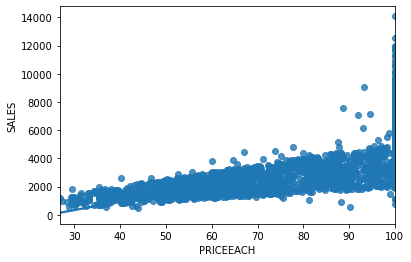

In [67]:
# ahora scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x="PRICEEACH", y="SALES", data=df)